# PRODIGY INFOTECH - DATA SCIENCE INTERNSHIP

## Name: Prajakta Shivanand Karate

## Task - 02

## Perform data cleaning and exploratory data analysis (EDA) on Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

# Importing Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from warnings import filterwarnings
filterwarnings(action='ignore')

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Exploratory Data Analysis

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.shape

(891, 12)

In [8]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Check Missing Data

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot: >

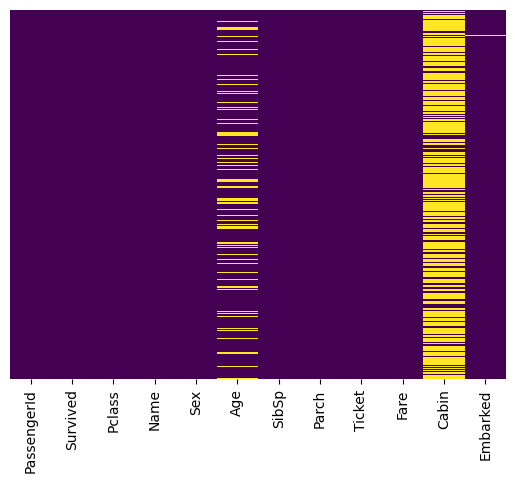

In [10]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Cleaning the Data

In [11]:
# Imputing missing values for age using mean
train['Age'].fillna(train['Age'].mean(), inplace=True)

In [12]:
# Imputing missing values for embarked 
# finding the most appeared value in embarked column
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [13]:
train['Embarked'].fillna('S', inplace=True)

In [14]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [15]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Changing data type for the following columns

In [16]:
train['Survived']=train['Survived'].astype('category')
train['Pclass']=train['Pclass'].astype('category')
train['Sex']=train['Sex'].astype('category')
train['Age']=train['Age'].astype('int')
train['Embarked']=train['Embarked'].astype('category')

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int32   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    category
dtypes: category(4), float64(1), int32(1), int64(3), object(3)
memory usage: 56.3+ KB


In [18]:
#five point summary
train.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


## Univariate Analysis - analyzing one variable (feature) at a time

Out of 891 62.0% people died in the accident


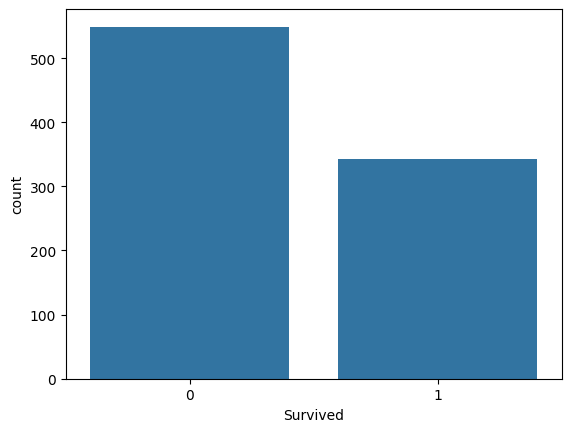

In [19]:
# Survived column

sns.countplot(x=train['Survived'])
death_percent=round((train['Survived'].value_counts()/891)*100)
print("Out of 891 {}% people died in the accident".format(death_percent[0]))

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64


<AxesSubplot: xlabel='Pclass', ylabel='count'>

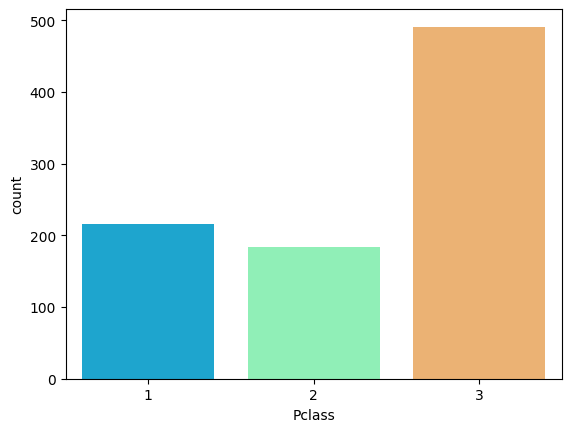

In [20]:
# Pclass Column

print((train['Pclass'].value_counts()/891)*100)
sns.countplot(x=train['Pclass'],palette='rainbow')

# Conclusion : Pclass was the most crowded class

Sex
male      64.758698
female    35.241302
Name: count, dtype: float64


<AxesSubplot: xlabel='Sex', ylabel='count'>

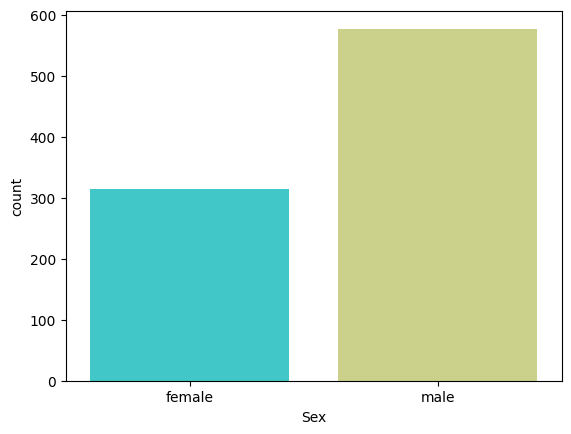

In [21]:
print((train['Sex'].value_counts()/891)*100)

sns.countplot(x=train['Sex'],palette='rainbow')

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


<AxesSubplot: xlabel='SibSp', ylabel='count'>

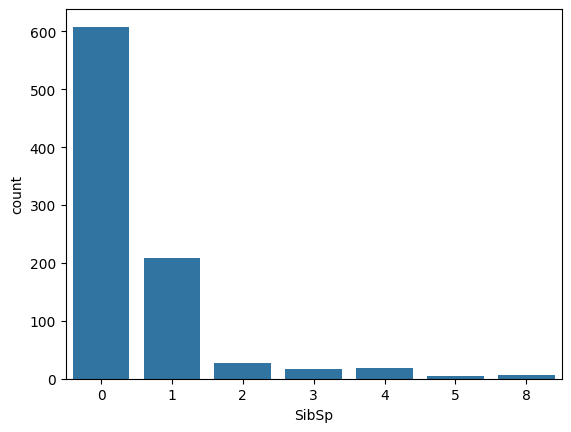

In [22]:
print(train['SibSp'].value_counts())

sns.countplot(x=train['SibSp'])

Parch
0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: count, dtype: float64


<AxesSubplot: xlabel='Parch', ylabel='count'>

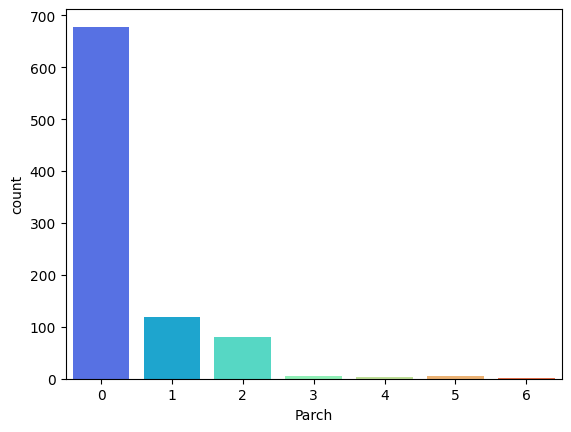

In [23]:
print((train['Parch'].value_counts()/891)*100)
sns.countplot(x=train['Parch'],palette='rainbow')

Embarked
S    72.502806
C    18.855219
Q     8.641975
Name: count, dtype: float64


<AxesSubplot: xlabel='Embarked', ylabel='count'>

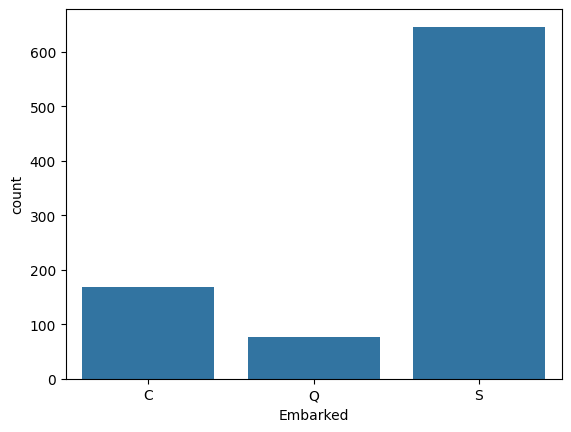

In [24]:
print((train['Embarked'].value_counts()/891)*100)

sns.countplot(x=train['Embarked'])

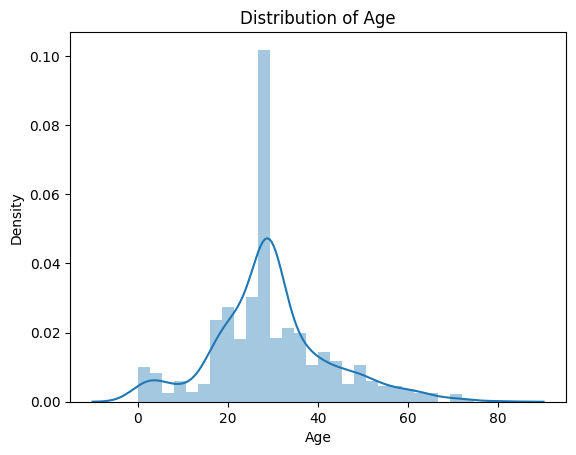

In [25]:
# Age column
sns.distplot(train['Age'].dropna(), kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

In [26]:
print(train['Age'].skew())

0.45956263424701577


In [27]:
print(train['Age'].kurt())

0.9865867453652877


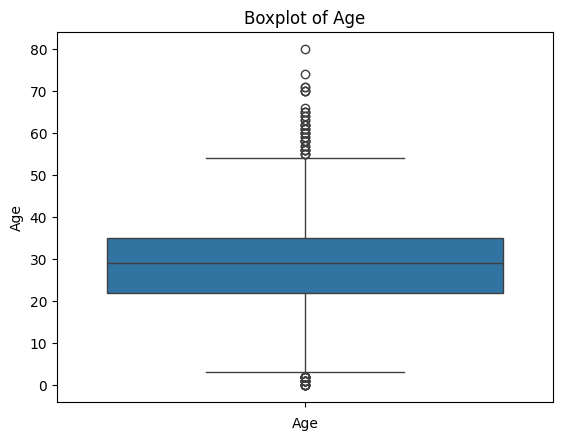

In [28]:
sns.boxplot(train['Age'])
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

In [29]:
print("People with age in between 60 and 70 are", train[(train['Age']>60) & (train['Age']<70)].shape[0])
print("People with age greater than 70 and 75 are", train[(train['Age']>=70) & (train['Age']<=75)].shape[0])
print("People with age greater than 75 are",train[train['Age']>75].shape[0])

print('-'*50)

print("People with age between 0 and 1 are",train[train['Age']<1].shape[0])

People with age in between 60 and 70 are 15
People with age greater than 70 and 75 are 6
People with age greater than 75 are 1
--------------------------------------------------
People with age between 0 and 1 are 7


## Conclusion:-

**For all practical purposes age can considered as normal distribution**

**Deeper Analysis is required for outlier detection**

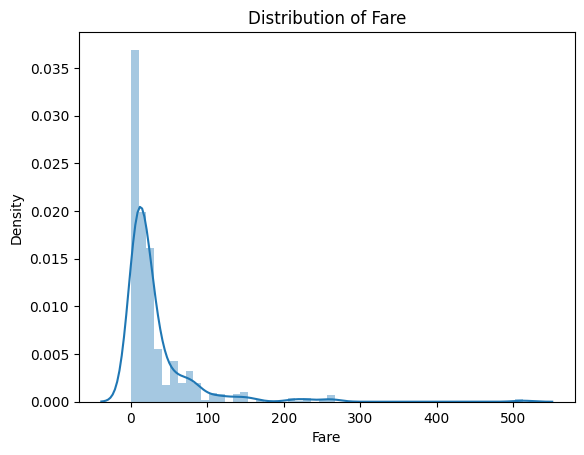

In [30]:
# Fare Column
sns.distplot(train['Fare'])
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.show()

In [31]:
print(train['Fare'].skew())

4.787316519674893


In [32]:
print(train['Fare'].kurt())

33.39814088089868


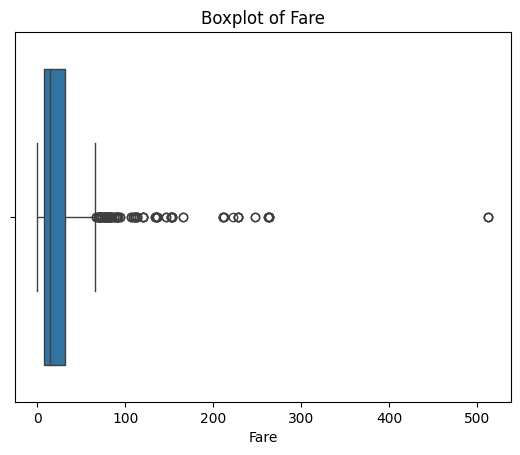

In [33]:
sns.boxplot(x=train['Fare'])
plt.title('Boxplot of Fare')
plt.xlabel('Fare')
plt.show()

In [34]:
print("People with fare in between $200 and $300 are",train[(train['Fare']>200) & (train['Fare']<300)].shape[0])
print("People with fare in greater than $300 are",train[train['Fare']>300].shape[0])

People with fare in between $200 and $300 are 17
People with fare in greater than $300 are 3


## Conclusion:-

**Highly skewed data, a lot of people had cheaper tickets**

**Outliers are there in the data**

# Multivariate Analysis - simultaneous analysis of multiple variables to understand the relationships and interactions between them.

Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


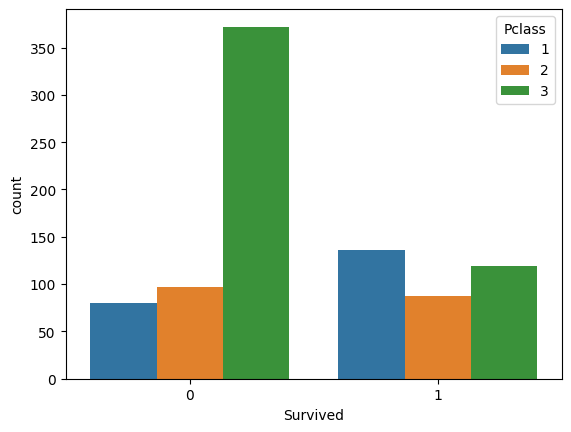

In [35]:
# Survival with Pclass

sns.countplot(x='Survived', hue='Pclass', data=train)

pd.crosstab(train['Pclass'], train['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


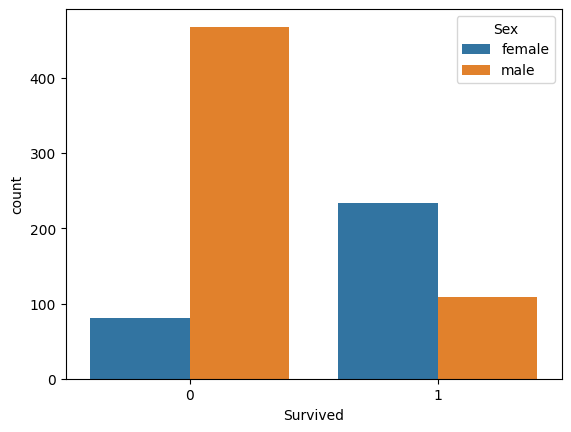

In [88]:
# Survival with Sex

sns.countplot(x='Survived', hue='Sex', data=train)

pd.crosstab(train['Sex'], train['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.1,33.9


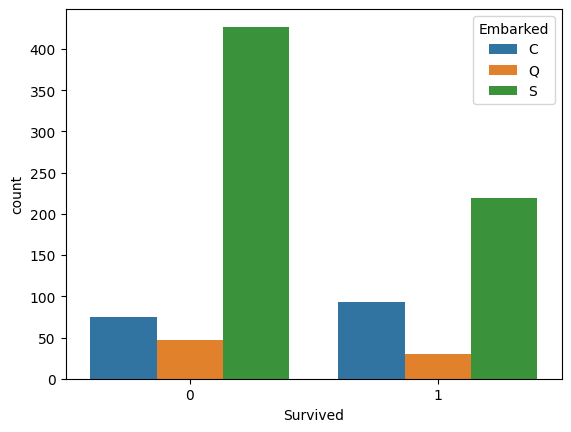

In [36]:
# Survival with Embarked

sns.countplot(x='Survived', hue='Embarked', data=train)

pd.crosstab(train['Embarked'], train['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

<AxesSubplot: xlabel='Age', ylabel='Density'>

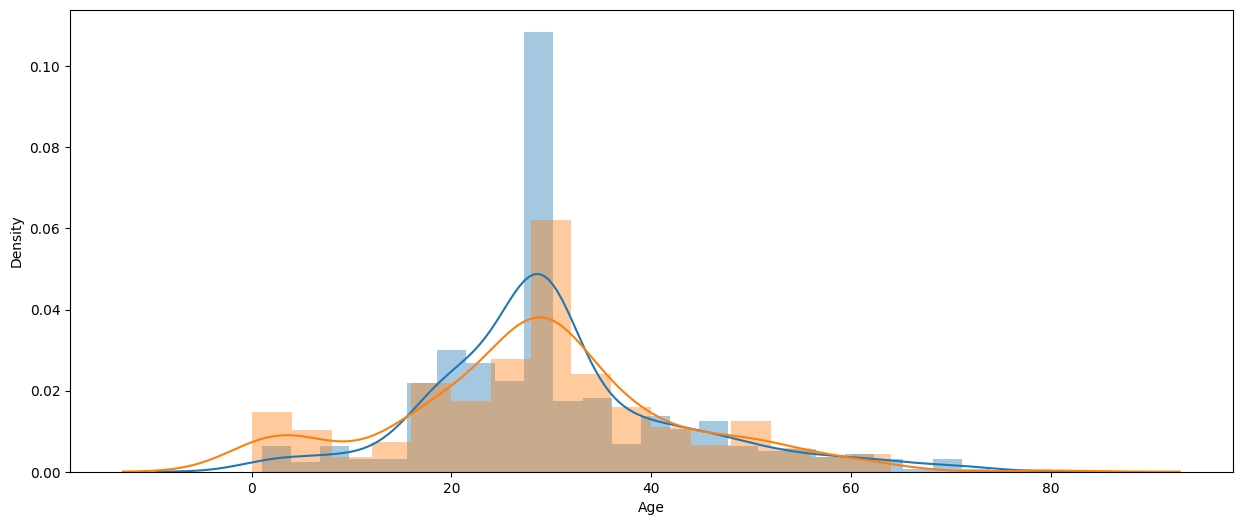

In [37]:
# Survived with Age

plt.figure(figsize=(15,6))
sns.distplot(train[train['Survived']==0]['Age'])
sns.distplot(train[train['Survived']==1]['Age'])

<AxesSubplot: xlabel='Fare', ylabel='Density'>

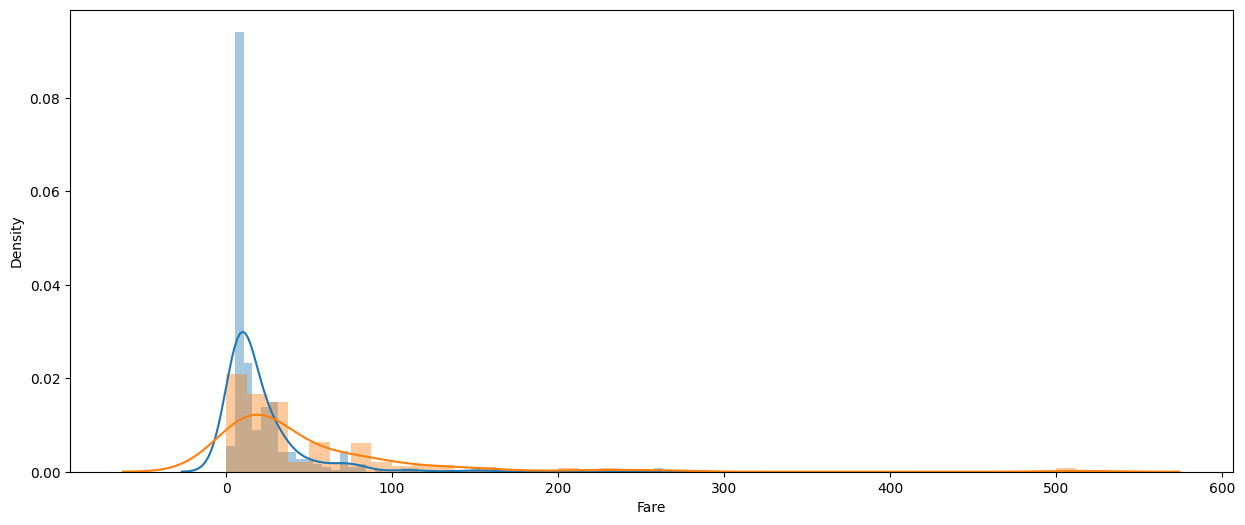

In [38]:
# Survived with Fare

plt.figure(figsize=(15,6))
sns.distplot(train[train['Survived']==0]['Fare'])
sns.distplot(train[train['Survived']==1]['Fare'])

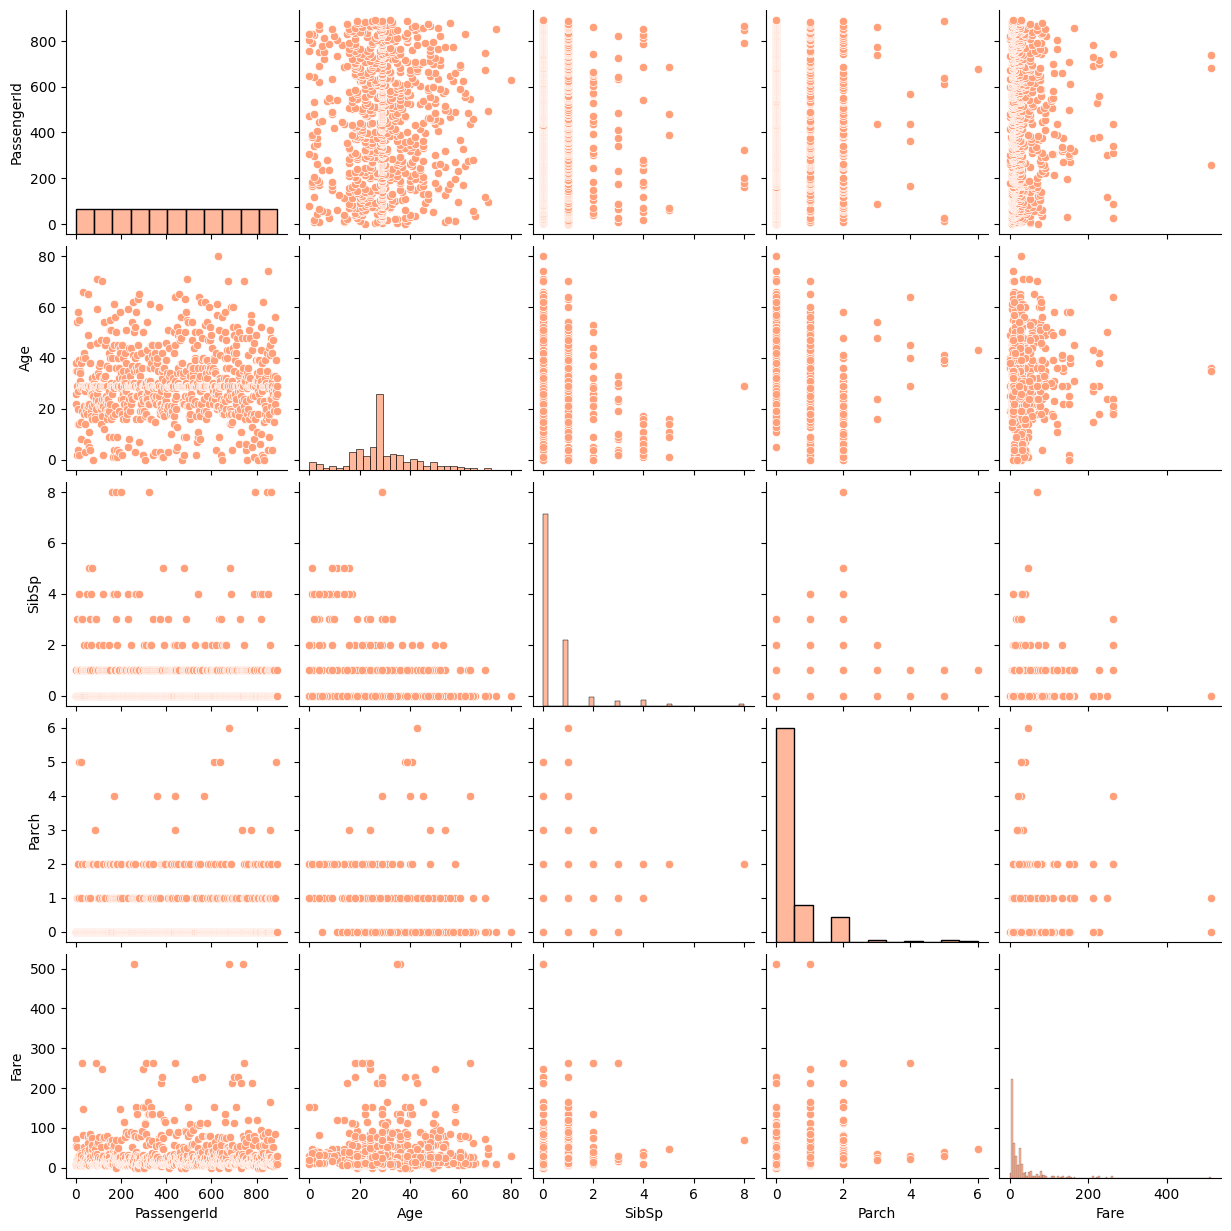

In [39]:
custom_palette = ["#FFA07A", "#FF7F50", "#FF6347"] 
sns.set_palette(custom_palette)
sns.pairplot(train)

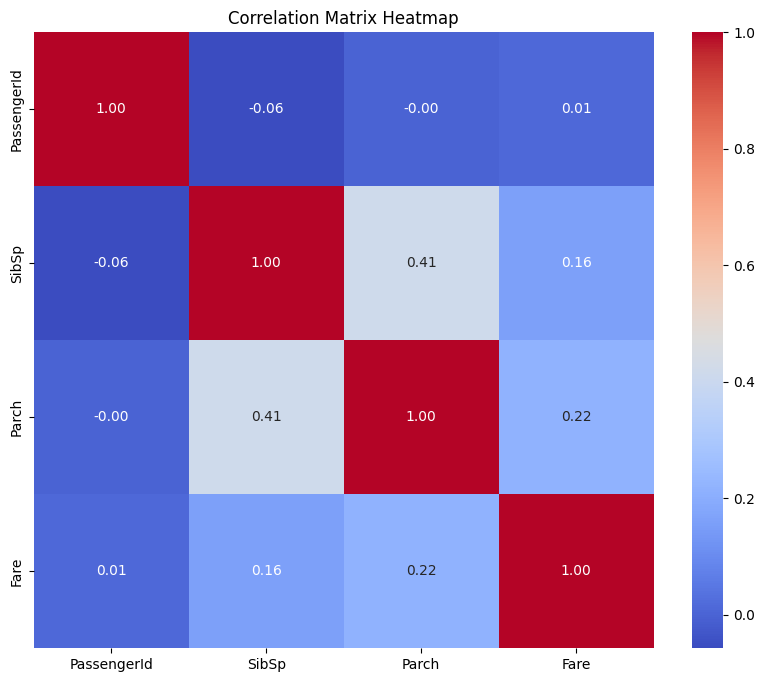

In [40]:
# Select only numeric columns
numeric_train = train.select_dtypes(include=['int64', 'float64'])

# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_train.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [41]:
# Feature Engineering

# We will create a new column by the name of family which will be the sum of SibSp and Parch cols

train['family_size'] = train['Parch'] + train['SibSp']

In [42]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
661,662,0,3,"Badt, Mr. Mohamed",male,40,0,0,2623,7.2250,NaN,C,0
333,334,0,3,"Vander Planke, Mr. Leo Edmondus",male,16,2,0,345764,18.0000,NaN,S,2
223,224,0,3,"Nenkoff, Mr. Christo",male,29,0,0,349234,7.8958,NaN,S,0
798,799,0,3,"Ibrahim Shawah, Mr. Yousseff",male,30,0,0,2685,7.2292,NaN,C,0
389,390,1,2,"Lehmann, Miss. Bertha",female,17,0,0,SC 1748,12.0000,NaN,C,0


In [43]:
# Now we will enginner a new feature by the name of family type

def family_type(number):
    if number==0:
        return "Alone"
    elif number>0 and number<=4:
        return "Medium"
    else:
        return "Large"

In [44]:
train['family_type'] = train['family_size'].apply(family_type)

In [45]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,family_type
178,179,0,2,"Hale, Mr. Reginald",male,30,0,0,250653,13.000,NaN,S,0,Alone
750,751,1,2,"Wells, Miss. Joan",female,4,1,1,29103,23.000,NaN,S,2,Medium
397,398,0,2,"McKane, Mr. Peter David",male,46,0,0,28403,26.000,NaN,S,0,Alone
300,301,1,3,"Kelly, Miss. Anna Katherine ""Annie Kate""",female,29,0,0,9234,7.750,NaN,Q,0,Alone
267,268,1,3,"Persson, Mr. Ernst Ulrik",male,25,1,0,347083,7.775,NaN,S,1,Medium


In [46]:
# Dropping SibSp, Parch and family_size

train.drop(columns=['SibSp','Parch','family_size'],inplace=True)

In [47]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,family_type
739,740,0,3,"Nankoff, Mr. Minko",male,29,349218,7.8958,NaN,S,Alone
133,134,1,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29,228414,26.0000,NaN,S,Medium
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,29,PC 17585,79.2000,NaN,C,Alone
584,585,0,3,"Paulner, Mr. Uscher",male,29,3411,8.7125,NaN,C,Alone
377,378,0,1,"Widener, Mr. Harry Elkins",male,27,113503,211.5000,C82,C,Medium


In [48]:
pd.crosstab(train['family_type'], train['Survived']).apply(lambda r: round((r/r.sum())*100, 1), axis=1)

Survived,0,1
family_type,,
Alone,69.6,30.4
Large,85.1,14.9
Medium,44.0,56.0


# Detecting Outliers

## Numerical Data

- If the data is following a normal distribution, anything beyond 3 standard deviations (mean + 3SD) can be considered as an outlier.
- If the data does not follow a normal distribution, we can use a boxplot to identify outliers. Points beyond Q1 - 1.5 * IQR and Q3 + 1.5 * IQR can be considered as outliers.

## Categorical Data

- If the column is highly imbalanced, for example, male 10000 and female 2, then we can consider eliminating the minority class (e.g., female).


In [49]:
#handling outliers in age(almost normal)

train = train[train['Age'] < (train['Age'].mean() + 3 * train['Age'].std())]
print(train.shape)

(884, 11)


In [50]:
# Finding quartiles for fare colummn

Q1 = np.percentile(train['Fare'], 25)
Q3 = np.percentile(train['Fare'], 75)

# Calculating outlier bounds
outlier_low = Q1 - 1.5 * (Q3 - Q1)
outlier_high = Q3 + 1.5 * (Q3 - Q1)

# Filtering outliers from the 'Fare' column
train = train[(train['Fare'] > outlier_low) & (train['Fare'] < outlier_high)]

In [51]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'family_type'],
      dtype='object')

In [52]:
# One hot encoding

train.sample(4)

# Cols to be transformed are Pclass, Sex, Embarked, family_type

pd.get_dummies(data=train, columns=['Pclass','Sex','Embarked','family_type'], drop_first=True)

,PassengerId,Survived,Name,Age,Ticket,Fare,Cabin,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,1,0,"Braund, Mr. Owen Harris",22,A/5 21171,7.2500,NaN,False,True,True,False,True,False,True
2,3,1,"Heikkinen, Miss. Laina",26,STON/O2. 3101282,7.9250,NaN,False,True,False,False,True,False,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,113803,53.1000,C123,False,False,False,False,True,False,True
4,5,0,"Allen, Mr. William Henry",35,373450,8.0500,NaN,False,True,True,False,True,False,False
5,6,0,"Moran, Mr. James",29,330877,8.4583,NaN,False,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27,211536,13.0000,NaN,True,False,True,False,True,False,False
887,888,1,"Graham, Miss. Margaret Edith",19,112053,30.0000,B42,False,False,False,False,True,False,False
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",29,W./C. 6607,23.4500,NaN,False,True,False,False,True,False,True
889,890,1,"Behr, Mr. Karl Howell",26,111369,30.0000,C148,False,False,True,False,False,False,False


In [53]:
train=pd.get_dummies(data=train, columns=['Pclass','Sex','Embarked','family_type'], drop_first=True)

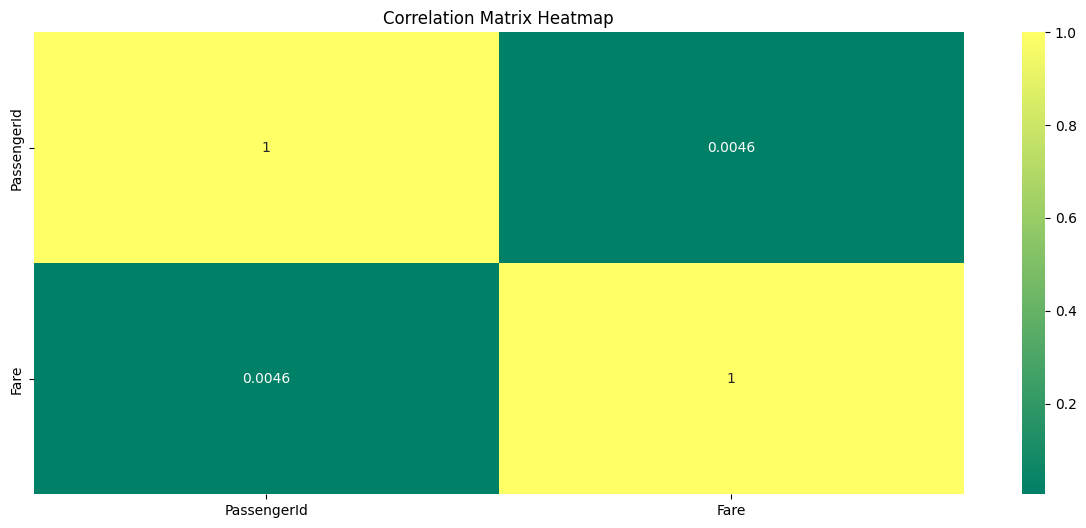

In [55]:
# Select only numeric columns
numeric_train = train.select_dtypes(include=['int64', 'float64'])

# Plot the correlation matrix heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(numeric_train.corr(), cmap='summer', annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Drawing Conclusions

- Chance of female survival is higher than male survival
- Travelling in Pclass 3 was deadliest
- Somehow, people going to C survived more
- People in the age range of 20 to 40 had a higher chance of not surviving
- People travelling with smaller families had a higher chance of surviving the accident in comparison to people with large families and travelling alone
